<a href="https://colab.research.google.com/github/nataliapatelczyk/Jupyter-Notebook-Interactive-Essay/blob/main/Interactive_Essay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Interactive Essay - using NLP features in Python*
### Natalia Patelczyk I MA-PJN 2025
This interactive essay aims to present how to conduct a lingusitic analysis of a chosen website. For my analysis I have chosen a *Wikipedia* article for **Powerlifting**, since it contains a lot of textual data.
Methodology of this analysis includes tokenization of the text, POS-tagging and conducting a quantitative analysis of parts of speech present in the text.

---

## Importing modules and toolkits
Firstly, all the modules and toolkits that will be used need to be imported and set up:
* requests - library that allows to create HTTP requests through Python
* BeautifulSoup - library that enables scraping data from websites
* NLTK - Natural Language Toolkit - Python package for NLP
  - word_tokenize - allows to tokenize text, i.e. transform a text into a list of words
  - stopwords - built-in list of stopwords that allows to filter the tokens so that only meaningful words are analyzed
  - WordNetLemmatizer - allows to transform tokens into lemmas, allowing for easier analysis

* matplotlib.pyplot - needed in order to create visualization of data in Python




In [104]:
import requests
page = requests.get("https://en.wikipedia.org/wiki/Powerlifting")

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import stopwords
stop_words = list(stopwords.words("english"))
nltk.download("stopwords")
from nltk.stem import WordNetLemmatizer as wnl
nltk.download('wordnet')

import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Text preprocessing

Next, by using BeautifulSoup I get rid of any empty paragraphs, leaving me with only paragraphs that include text.

In [105]:
paras = [paragraph for paragraph in soup.find_all("p")]
only_text = []

for el in paras:
    if len(el.getText().strip()) > 0:
      only_text.append(el.getText().strip())
print(only_text)

['Powerlifting is a competitive strength sport that consists of three attempts at maximal weight on three lifts: squat, bench press, and deadlift. As in the sport of Olympic weightlifting, it involves the athlete attempting a maximal weight single-lift effort of a barbell loaded with weight plates. Powerlifting evolved from a sport known as "odd lifts", which followed the same three-attempt format but used a wider variety of events, akin to strongman competition. Eventually, odd lifts became standardized to the current three.', "In competition, lifts may be performed equipped or unequipped (typically referred to as 'classic' or 'raw' lifting in the IPF specifically). Equipment in this context refers to a supportive bench shirt or squat/deadlift suit or briefs. In some federations, knee wraps are permitted in the equipped but not unequipped division; in others, they may be used in both equipped and unequipped lifting. Weightlifting belts, knee sleeves, wrist wraps, and special footwear 

These paragraphs then need to be tokenized, so that the individual words can later be POS-tagged. This is also done with a method from NLTK.
This method of tokenization has created a list of nested lists, so with a for-loop I concatenate them into one list.

In [106]:
tokenized = []
only_words = []
for sentence in only_text:
  tokenized.append(word_tokenize(sentence))
for nested_list in tokenized:
  only_words += nested_list
print(only_words)







['Powerlifting', 'is', 'a', 'competitive', 'strength', 'sport', 'that', 'consists', 'of', 'three', 'attempts', 'at', 'maximal', 'weight', 'on', 'three', 'lifts', ':', 'squat', ',', 'bench', 'press', ',', 'and', 'deadlift', '.', 'As', 'in', 'the', 'sport', 'of', 'Olympic', 'weightlifting', ',', 'it', 'involves', 'the', 'athlete', 'attempting', 'a', 'maximal', 'weight', 'single-lift', 'effort', 'of', 'a', 'barbell', 'loaded', 'with', 'weight', 'plates', '.', 'Powerlifting', 'evolved', 'from', 'a', 'sport', 'known', 'as', '``', 'odd', 'lifts', "''", ',', 'which', 'followed', 'the', 'same', 'three-attempt', 'format', 'but', 'used', 'a', 'wider', 'variety', 'of', 'events', ',', 'akin', 'to', 'strongman', 'competition', '.', 'Eventually', ',', 'odd', 'lifts', 'became', 'standardized', 'to', 'the', 'current', 'three', '.', 'In', 'competition', ',', 'lifts', 'may', 'be', 'performed', 'equipped', 'or', 'unequipped', '(', 'typically', 'referred', 'to', 'as', "'classic", "'", 'or', "'raw", "'", '

Since there are a lot of stopwords and punctuation that could hinder the results, they need to be removed. This can be achieved with the stopwords model from NLTK. I create a new list that only contains tokens that are not special characters or stopwords.

In [107]:
special_characters = [".",",","(",")",":",";","''","``","[","]"]
without_stops = []
for element in only_words:
  if element not in stop_words:
    if element not in special_characters:
      without_stops.append(element)


In [108]:
print(without_stops)


['Powerlifting', 'competitive', 'strength', 'sport', 'consists', 'three', 'attempts', 'maximal', 'weight', 'three', 'lifts', 'squat', 'bench', 'press', 'deadlift', 'As', 'sport', 'Olympic', 'weightlifting', 'involves', 'athlete', 'attempting', 'maximal', 'weight', 'single-lift', 'effort', 'barbell', 'loaded', 'weight', 'plates', 'Powerlifting', 'evolved', 'sport', 'known', 'odd', 'lifts', 'followed', 'three-attempt', 'format', 'used', 'wider', 'variety', 'events', 'akin', 'strongman', 'competition', 'Eventually', 'odd', 'lifts', 'became', 'standardized', 'current', 'three', 'In', 'competition', 'lifts', 'may', 'performed', 'equipped', 'unequipped', 'typically', 'referred', "'classic", "'", "'raw", "'", 'lifting', 'IPF', 'specifically', 'Equipment', 'context', 'refers', 'supportive', 'bench', 'shirt', 'squat/deadlift', 'suit', 'briefs', 'In', 'federations', 'knee', 'wraps', 'permitted', 'equipped', 'unequipped', 'division', 'others', 'may', 'used', 'equipped', 'unequipped', 'lifting', '

Now that I have a list of tokens without any stopwords or punctuation, these tokens need to be lemmatized. In order to do that, I use **NLTK Wordnet** module.

In [109]:
lemmatized = [wnl().lemmatize(word) for word in without_stops]
print(lemmatized)

['Powerlifting', 'competitive', 'strength', 'sport', 'consists', 'three', 'attempt', 'maximal', 'weight', 'three', 'lift', 'squat', 'bench', 'press', 'deadlift', 'As', 'sport', 'Olympic', 'weightlifting', 'involves', 'athlete', 'attempting', 'maximal', 'weight', 'single-lift', 'effort', 'barbell', 'loaded', 'weight', 'plate', 'Powerlifting', 'evolved', 'sport', 'known', 'odd', 'lift', 'followed', 'three-attempt', 'format', 'used', 'wider', 'variety', 'event', 'akin', 'strongman', 'competition', 'Eventually', 'odd', 'lift', 'became', 'standardized', 'current', 'three', 'In', 'competition', 'lift', 'may', 'performed', 'equipped', 'unequipped', 'typically', 'referred', "'classic", "'", "'raw", "'", 'lifting', 'IPF', 'specifically', 'Equipment', 'context', 'refers', 'supportive', 'bench', 'shirt', 'squat/deadlift', 'suit', 'brief', 'In', 'federation', 'knee', 'wrap', 'permitted', 'equipped', 'unequipped', 'division', 'others', 'may', 'used', 'equipped', 'unequipped', 'lifting', 'Weightlift

The last step is POS-tagging all the lemmas. This can be done with **NLTK POS tag** module.

In [110]:
tuples = []
tagged = nltk.pos_tag(lemmatized)
for item in tagged:
  tuples.append(item)

## Analysis - number of POS tags

After each token has an assigned part of speech, I create a short loop that assigns the part of speech and amount of appearences of it in the text into a dictionary.

In [111]:
counter_dict = {}

for el in tuples:
    tag = el[1]
    if not tag in counter_dict:
        counter_dict[tag] = 1
    else:
        counter_dict[tag] += 1
print(counter_dict)

{'VBG': 164, 'JJ': 488, 'NN': 1239, 'VBZ': 31, 'CD': 348, 'VBD': 199, 'IN': 110, 'NNP': 437, 'NNS': 52, 'VBN': 78, 'MD': 38, 'VB': 56, 'RB': 109, 'POS': 36, 'VBP': 48, 'DT': 81, 'NNPS': 9, 'JJR': 23, 'EX': 8, 'RP': 1, "''": 9, 'JJS': 9, 'RBR': 14, 'WRB': 3, 'PRP': 7, 'TO': 1, 'CC': 1, 'FW': 1}


The key and value pairs from the created dictionary are divided into two separate lists, so that the two lists can serve as the x and y axis of the chart.

In [112]:
keys = []
values = []
for el in counter_dict:
    keys.append(el)
    values.append(counter_dict[el])

<BarContainer object of 10 artists>

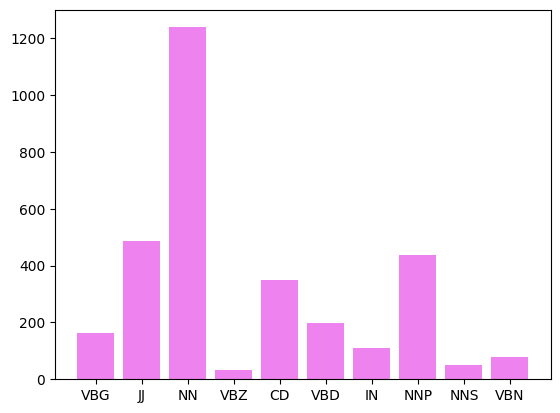

In [113]:
plt.bar(keys[0:10], values[0:10], color = "violet")

##Conclusions
Based on the chart above, nouns are the most prevalent part of speech in the text: NN, NNP and NNS together make up a large majority of the tags. This could be predicted, as the chosen source, Wikipedia, is usually largely informational and content-dense. The Wikipedia article explains what Powerlifting is, therefore it uses a considerable number of names - in order to explain, for example, rules or certain movements.

Large amount of adjectives (JJ) might reflect that text is descriptively detailed, which is consistent with the encyclopedic style of the text.
The notably high frequency of cardinal numbers (CD) suggests that the article includes substantial numerical data, which is predictable as well, as powerlifting is a sport that is based largely on numbers, such as weights, points, weight classes, and age classes.

Overall, the parts of speech present in the text support the conclusion that the article adheres to the conventions of formal, expository writing, which prioritizes precise descriptions.





## References
https://en.wikipedia.org/wiki/Powerlifting